**MENTAL** **HEALTH** **RISK**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df=pd.read_csv("/content/mental_health_dataset.csv")
df

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,Yes,9,6.1,0,28,21,32,56.7,High


In [8]:
df.isnull().sum()

,0
age,0
gender,0
employment_status,0
work_environment,0
mental_health_history,0
seeks_treatment,0
stress_level,0
sleep_hours,0
physical_activity_days,0
depression_score,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

In [10]:
df.describe()

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [11]:
df.shape

(10000, 14)

In [12]:
df.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [13]:
df['gender'].replace({'Male':1,'Female':0,'Non-binary':2},inplace=True)
df['employment_status'].replace({'Employed':1,'Student':0,'Self-employed':2,'Unemployed':3},inplace=True)
df['work_environment'].replace({'On-site':0,'Remote':1,'Hybrid':2},inplace=True)
df['mental_health_history'].replace({'Yes':1,'No':0},inplace=True)
df['seeks_treatment'].replace({'Yes':1,'No':0},inplace=True)
df['mental_health_risk'].replace({'High':2,'Low':0,'Medium':1},inplace=True)
df

/tmp/ipython-input-3637277081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Male':1,'Female':0,'Non-binary':2},inplace=True)
/tmp/ipython-input-3637277081.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,1,1,0,1,1,6,6.2,3,28,17,54,59.7,2
1,46,0,0,0,0,1,10,9.0,4,30,11,85,54.9,2
2,32,0,1,0,1,0,7,7.7,2,24,7,62,61.3,1
3,60,2,2,0,0,0,4,4.5,4,6,0,95,97.0,0
4,25,0,2,0,1,1,3,5.4,0,24,12,70,69.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,0,1,0,1,1,5,6.1,3,9,21,8,90.0,1
9996,47,1,1,0,1,0,1,5.7,3,5,12,45,90.8,1
9997,56,0,1,0,1,0,1,8.3,0,1,18,7,99.2,1
9998,24,1,1,0,1,1,9,6.1,0,28,21,32,56.7,2


graph for age

<Axes: xlabel='age'>

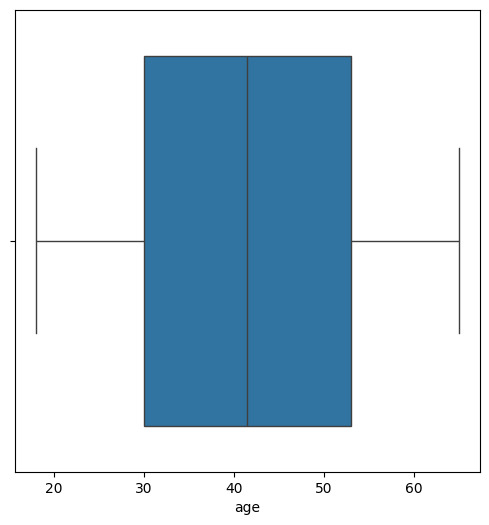

In [14]:
plt.subplots(figsize=(6,6))
plt.plot()
sns.boxplot(df.age, orient='h')

/tmp/ipython-input-2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

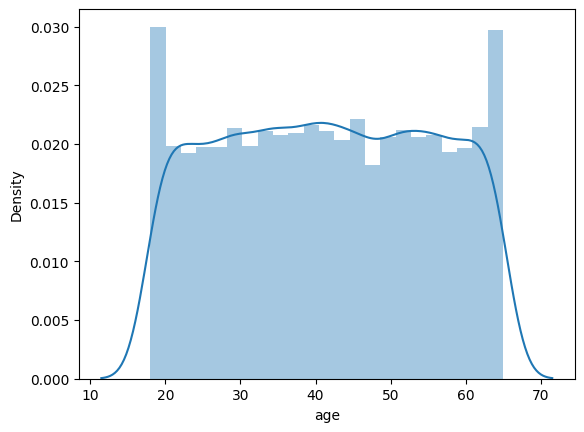

In [15]:
sns.distplot(df.age)

/tmp/ipython-input-1881869917.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stress_level'])


<Axes: xlabel='stress_level', ylabel='Density'>

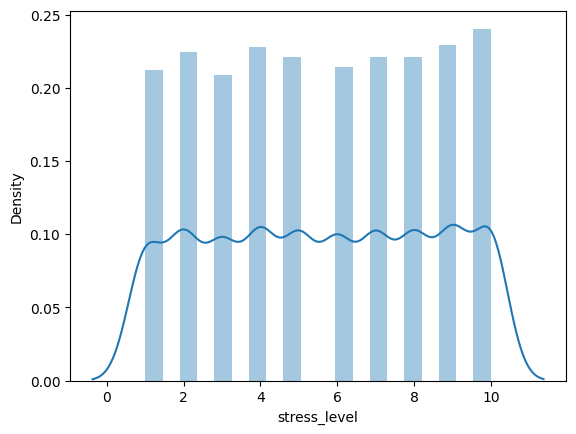

In [16]:
sns.distplot(df['stress_level'])

/tmp/ipython-input-794287050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['physical_activity_days'])


<Axes: xlabel='physical_activity_days', ylabel='Density'>

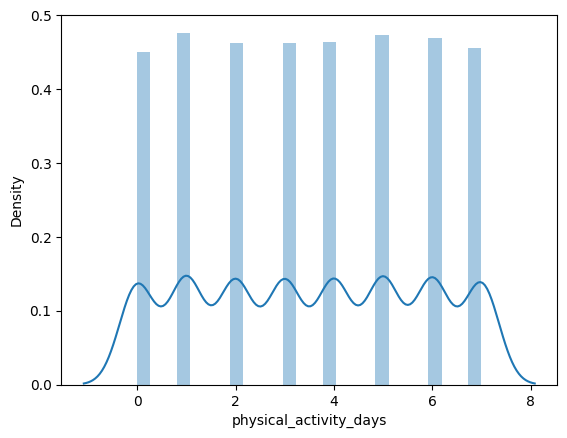

In [17]:
sns.distplot(df['physical_activity_days'])

# Graph for Mental health risk

/tmp/ipython-input-3771541118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mental_health_risk'])


<Axes: xlabel='mental_health_risk', ylabel='Density'>

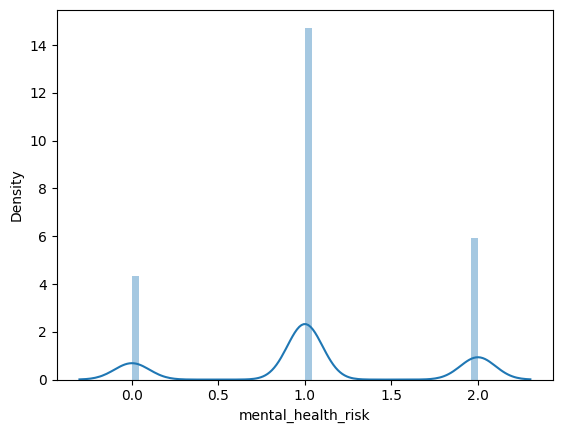

In [ ]:
sns.distplot(df['mental_health_risk'])

# Description of dataset

In [ ]:
df.describe(include='all')

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
count,10000.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4557.0,NaN,5044.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,41.557600,NaN,1.109000,NaN,0.303100,0.398800,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210,1.063000
std,13.749581,NaN,0.845335,NaN,0.459621,0.489676,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202,0.637865
min,18.000000,NaN,0.000000,NaN,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000,0.000000
25%,30.000000,NaN,1.000000,NaN,0.000000,0.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000,1.000000
50%,41.500000,NaN,1.000000,NaN,0.000000,0.000000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000,1.000000
75%,53.000000,NaN,1.000000,NaN,1.000000,1.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
employment_status,0
work_environment,0
mental_health_history,0
seeks_treatment,0
stress_level,0
sleep_hours,0
physical_activity_days,0
depression_score,0


checking counts value

In [ ]:
df['mental_health_risk'].value_counts()

,count
mental_health_risk,
1,5892
2,2369
0,1739


# Assigning x&y and data balancing

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler(random_state=42)

X=df.drop('mental_health_risk',axis=1)
y=df['mental_health_risk']
x,y=rs.fit_resample(x,y)
print("After undersampling dataset shape")
y.value_counts()

After undersampling dataset shape


,count
mental_health_risk,
0,1739
1,1739
2,1739


# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
print(x_test)
x_train

      age gender  employment_status  work_environment  mental_health_history  \
9394   28      1                  2                 0                      0   
898    40      1                  3                 0                      0   
2398   39      0                  1                 2                      0   
5906   29      0                  1                 2                      0   
2343   49      1                  1                 0                      0   
...   ...    ...                ...               ...                    ...   
1037   48      0                  1                 2                      0   
2899   65      1                  1                 0                      0   
9549   33      1                  2                 1                      0   
2740   42      1                  1                 1                      0   
6690   40      0                  0                 0                      1   

      seeks_treatment  stress_level  sl

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
7389,30,1,1,2,0,0,10,4.8,3,2,1,86,98.5
9275,45,1,0,2,1,0,2,5.9,7,22,20,38,68.7
2995,38,0,1,2,0,0,9,8.2,5,5,11,16,85.2
5316,55,1,1,0,1,0,7,7.7,0,5,2,64,92.7
356,52,2,1,0,1,0,4,5.7,5,12,13,35,85.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,64,1,1,2,0,1,9,4.5,3,29,14,41,55.7
4859,32,0,1,0,0,0,3,7.3,0,7,0,18,89.4
3264,51,1,1,2,0,1,7,4.1,2,30,5,42,60.3
9845,40,0,0,0,0,0,9,6.3,3,12,21,68,88.3


logistic **regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

lr=LogisticRegression(max_iter=5000) # Increased max_iter further to help with convergence

# Identify categorical columns in x_train that might still be objects
categorical_cols = x_train.select_dtypes(include='object').columns

# Apply one-hot encoding to training and testing features
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

lr.fit(x_train_encoded, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
ypred_train=lr.predict(x_train_encoded)
ypred_test=lr.predict(x_test_encoded)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))


0.981
0.986


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[ 352,   12,    0],
       [   8, 1146,    6],
       [   0,    2,  474]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       364
           1       0.99      0.99      0.99      1160
           2       0.99      1.00      0.99       476

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [ ]:
train_predictions=model.predict(x_train_encoded)
df

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,1,1,0,1,1,6,6.2,3,28,17,54,59.7,2
1,46,0,0,0,0,1,10,9.0,4,30,11,85,54.9,2
2,32,0,1,0,1,0,7,7.7,2,24,7,62,61.3,1
3,60,2,2,0,0,0,4,4.5,4,6,0,95,97.0,0
4,25,0,2,0,1,1,3,5.4,0,24,12,70,69.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,0,1,0,1,1,5,6.1,3,9,21,8,90.0,1
9996,47,1,1,0,1,0,1,5.7,3,5,12,45,90.8,1
9997,56,0,1,0,1,0,1,8.3,0,1,18,7,99.2,1
9998,24,1,1,0,1,1,9,6.1,0,28,21,32,56.7,2


In [ ]:
test_predictions=model.predict(x_test_encoded)
df

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,1,1,0,1,1,6,6.2,3,28,17,54,59.7,2
1,46,0,0,0,0,1,10,9.0,4,30,11,85,54.9,2
2,32,0,1,0,1,0,7,7.7,2,24,7,62,61.3,1
3,60,2,2,0,0,0,4,4.5,4,6,0,95,97.0,0
4,25,0,2,0,1,1,3,5.4,0,24,12,70,69.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,0,1,0,1,1,5,6.1,3,9,21,8,90.0,1
9996,47,1,1,0,1,0,1,5.7,3,5,12,45,90.8,1
9997,56,0,1,0,1,0,1,8.3,0,1,18,7,99.2,1
9998,24,1,1,0,1,1,9,6.1,0,28,21,32,56.7,2


In [ ]:
from sklearn.model_selection import cross_val_score
import pandas as pd

# Identify categorical columns in the full 'x' DataFrame
categorical_cols_x = x.select_dtypes(include='object').columns

# Apply one-hot encoding to the full 'x' DataFrame
x_encoded = pd.get_dummies(x, columns=categorical_cols_x, drop_first=True)

# Perform cross-validation with the encoded 'x'
scores=cross_val_score(model, x_encoded, y, cv=5)
print(scores)
scores.mean()

[0.80114017 0.79639869 0.80149666 0.79961672 0.80457687]


np.float64(0.8006458231724627)

In [ ]:
from sklearn.svm import SVC
import pandas as pd # Import pandas for get_dummies

model=SVC()

# Identify categorical columns in x_train that might still be objects
categorical_cols = x_train.select_dtypes(include='object').columns

# Apply one-hot encoding to training and testing features
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# Align columns - crucial step if get_dummies resulted in different columns between train and test
# This handles cases where test set might miss a category present in train, or vice-versa
missing_cols_in_test = set(x_train_encoded.columns) - set(x_test_encoded.columns)
for c in missing_cols_in_test:
    x_test_encoded[c] = 0
# Ensure the order of columns in x_test_encoded is the same as in x_train_encoded
x_test_encoded = x_test_encoded[x_train_encoded.columns]

model.fit(x_train_encoded,y_train)
ypred_train=model.predict(x_train_encoded)
ypred_test=model.predict(x_test_encoded)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.962
0.9645


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd # Import pandas for get_dummies

estimator=SVC()
param_grid={'C':[0.01,0.1,1,10,100],'kernel':['linear','rbf','sigmoid','poly']}

# Identify categorical columns in the full 'x' DataFrame that might still be objects
categorical_cols_x = x.select_dtypes(include='object').columns

# Apply one-hot encoding to the full 'x' DataFrame
x_encoded = pd.get_dummies(x, columns=categorical_cols_x, drop_first=True)

grid=GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x_encoded,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd # Ensure pandas is imported

model=SVC(kernel='linear',C=0.01)

# Identify categorical columns in x_train that might still be objects
categorical_cols = x_train.select_dtypes(include='object').columns

# Apply one-hot encoding to training and testing features
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# This handles cases where test set might miss a category present in train, or vice-versa
missing_cols_in_test = set(x_train_encoded.columns) - set(x_test_encoded.columns)
for c in missing_cols_in_test:
    x_test_encoded[c] = 0
# Ensure the order of columns in x_test_encoded is the same as in x_train_encoded
x_test_encoded = x_test_encoded[x_train_encoded.columns]

model.fit(x_train_encoded,y_train)
ypred_train=model.predict(x_train_encoded)
ypred_test=model.predict(x_test_encoded)
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.9955
0.9965


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train_encoded,y_train)


KNeighborsClassifier()

In [ ]:
y_pred_train=knn_model.predict(x_train_encoded)
y_pred_test=knn_model.predict(x_test_encoded)

from sklearn.metrics import accuracy_score
print("Train:",accuracy_score(y_train,y_pred_train))
print("Test:",accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x_encoded,y,cv=5)
print('cross_validation:',scores.mean())

Train: 0.945875
Test: 0.9065
cross_validation: 0.9084999999999999


# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train_encoded,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
pred_train=dt_model.predict(x_train_encoded)
pred_test=dt_model.predict(x_test_encoded)

In [ ]:
from sklearn.metrics import accuracy_score
print("Train:",accuracy_score(y_train,pred_train))
print("Test:",accuracy_score(y_test,pred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_model,x_encoded,y,cv=5)
print('cross_validation:',scores.mean())

Train: 1.0
Test: 0.996
cross_validation: 0.9989000000000001


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(x_train_encoded,y_train)

ypred_train=rf_model.predict(x_train_encoded)
ypred_test=rf_model.predict(x_test_encoded)

from sklearn.metrics import accuracy_score
print("Train:",accuracy_score(y_train,ypred_train))
print("Test:",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf_model,x_encoded,y,cv=5)
print('cross_validation:',scores.mean())

Train: 1.0
Test: 0.967
cross_validation: 0.9696999999999999


# Final Result

In [ ]:
import pandas as pd

Algorithm={
    "Name":["LR","SVM","KNN","DT","RF"],
    "Train":[0.98,0.99,0.94,1.0,1.0],
    "Test":[0.98,0.99,0.90,0.99,0.96],
    "CV":[0.97,0.98,0.90,0.99,0.96]
}
df=pd.DataFrame(Algorithm)
df

,Name,Train,Test,CV
0,LR,0.98,0.98,0.97
1,SVM,0.99,0.99,0.98
2,KNN,0.94,0.90,0.90
3,DT,1.00,0.99,0.99
4,RF,1.00,0.96,0.96
